In [1]:
import json
import pandas as pd
import os
import numpy as np
import tiktoken
from pathlib import Path 

In [2]:
filtered_csv_path = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/pythonFilesGuy/filtered_df.csv'
filtered_df = pd.read_csv(filtered_csv_path)

In [3]:
len(filtered_df)

131155

In [4]:
filtered_df.head(3)

,image_path,caption_path,patient_uid,pmc_id,article_path,unique_articles_sim_patients,caption_text,caption_id
0,PMC8167975/8167975_1/8167975_1_1.jpg,PMC8167975/8167975_1/8167975_1_1.txt,8167975-1,8167975,https://ncbi.nlm.nih.gov/pmc/articles/PMC8167975,['5563556-1'],"Fundus photograph showed a yellowish white, pe...",8167975_1_1
1,PMC8167975/8167975_1/8167975_1_2.jpg,PMC8167975/8167975_1/8167975_1_2.txt,8167975-1,8167975,https://ncbi.nlm.nih.gov/pmc/articles/PMC8167975,['5563556-1'],B-scan demonstrated focal subretinal calcifica...,8167975_1_2
2,PMC8167975/8167975_1/8167975_1_3.jpg,PMC8167975/8167975_1/8167975_1_3.txt,8167975-1,8167975,https://ncbi.nlm.nih.gov/pmc/articles/PMC8167975,['5563556-1'],CT demonstrated a hyperdense choroidal plaque ...,8167975_1_3


In [5]:
import pandas as pd
df = pd.read_csv('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/final_csv2.csv')
len(df)

188516

In [6]:
# 'filtered_df' refers to the paths corresponding to compound figures
filtered_df = pd.read_csv('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/pythonFilesGuy/filtered_df.csv')
len(filtered_df)

131155

In [7]:
with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/pairs_text_list.json') as f:
    pairs_text_list = json.load(f)

In [8]:
len(pairs_text_list)

31692

In [9]:
pairs_text_list[0:1]

[[['/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_1.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_2.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_3.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_4.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_5.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_6.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_7.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_8.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_9.txt'],
  ['/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC5563556/5563556_1/5563556_1_3.txt',
   '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC5563556/5563

In [10]:
# pairs_text = [
#     [ [open(p, encoding="utf-8").read().strip() for p in patient_group]
#       for patient_group in pair ]
#     for pair in pairs_text_list
# ]

with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/pairs_text.json', 'r') as f:
    pairs_text = json.load(f)

In [11]:
len(pairs_text)

31692

In [12]:
# with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/pairs_text.json', 'w') as f:
#     json.dump(pairs_text, f)

#### Creating a new 3D-list to keep track of the captions labels (e.g., '8167975_1_3')

In [13]:
pairs_text[0:1]

[[['Fundus photograph showed a yellowish white, peripapillary and sharply demarcated choroidal lesion involving the macula (white arrows)',
   'B-scan demonstrated focal subretinal calcification next to the optic disc (white arrow)',
   'CT demonstrated a hyperdense choroidal plaque with the same density as bone typically (white arrow)',
   'OCT showed serous fluid exudates under the macula (white asterisk)',
   'Right fundus showed an enlarged choroidal osteoma in most margins at posterior pole (white arrow) with schistose hemorrhage (black asterisk) beside macula compared to eight years ago. Partial decalcification on the inferior margin and visibility of large choroidal vessels were noted (white asterisk)',
   'OCTA revealed unique features in the vascular changes of CNV in CO in the outer retinal layer and choroid capillary layers, and subretinal neovascularization (white arrow)',
   'ICGA showed there was hypo-fluorescence at the peripapillary with faint hyper-fluorescence at the 

In [14]:
stems_3d = [
    [
        [Path(p).stem for p in sin_patient]   # 3rd level: every path in one patient
        for sin_patient in pair              # 2nd level: both patients in the pair
    ]
    for pair in pairs_text_list              # 1st level: all pairs
]

stems_3d[0:1]


[[['8167975_1_1',
   '8167975_1_2',
   '8167975_1_3',
   '8167975_1_4',
   '8167975_1_5',
   '8167975_1_6',
   '8167975_1_7',
   '8167975_1_8',
   '8167975_1_9'],
  ['5563556_1_3', '5563556_1_4', '5563556_1_5']]]

In [15]:
with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/generated_answers.json', 'r') as f:
    generated_answers = json.load(f)

In [16]:
len(generated_answers)

31002

In [17]:
with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/generated_questions.json', 'r') as f:
    generated_questions = json.load(f)

Note that:
1. The length of 'generated_answers' & 'generated_questions' is 31,002
2. The length of 'pairs_text' is 31,692

So we need 'common_indices' to align these two lists.

In [18]:
with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/common_indices.json', 'r') as g:
    common_indices = json.load(g)

idx = 101
common_index = common_indices[idx]

captions1 = pairs_text[common_index][0]

captions2 = pairs_text[common_index][1]

curr_questions = generated_questions[idx]

curr_answers = generated_answers[idx]

In [19]:
len(common_indices)

31002

In [20]:
# model_name = "gpt-4o"           
# enc = tiktoken.encoding_for_model(model_name)
# answers_series = pd.Series(generated_answers)
# token_counts = answers_series.apply(lambda t: len(enc.encode(t)))
# print(f"Token counts for generated answers: {token_counts.sum()}")

In [21]:
# model_name = "gpt-4o"           
# enc = tiktoken.encoding_for_model(model_name)
# queries_series = pd.Series(generated_questions)
# token_counts = queries_series.apply(lambda t: len(enc.encode(t)))
# print(f"Token counts for generated queries: {token_counts.sum()}")

In [22]:
# stems_3d = [
#     [
#         [Path(p).stem for p in sin_patient]   # 3rd level: every path in one patient
#         for sin_patient in pair              # 2nd level: both patients in the pair
#     ]
#     for pair in pairs_text_list              # 1st level: all pairs
# ]

# with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/stems_3d.json', 'w') as f:
#     json.dump(stems_3d, f)

with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/stems_3d.json', 'r') as f:
    stems_3d = json.load(f)

In [23]:
pairs_text[0][0]

['Fundus photograph showed a yellowish white, peripapillary and sharply demarcated choroidal lesion involving the macula (white arrows)',
 'B-scan demonstrated focal subretinal calcification next to the optic disc (white arrow)',
 'CT demonstrated a hyperdense choroidal plaque with the same density as bone typically (white arrow)',
 'OCT showed serous fluid exudates under the macula (white asterisk)',
 'Right fundus showed an enlarged choroidal osteoma in most margins at posterior pole (white arrow) with schistose hemorrhage (black asterisk) beside macula compared to eight years ago. Partial decalcification on the inferior margin and visibility of large choroidal vessels were noted (white asterisk)',
 'OCTA revealed unique features in the vascular changes of CNV in CO in the outer retinal layer and choroid capillary layers, and subretinal neovascularization (white arrow)',
 'ICGA showed there was hypo-fluorescence at the peripapillary with faint hyper-fluorescence at the macular, corre

In [24]:
pairs_text[0][1]

['B-scan ultrasonography imaging of the right eye reveals a choroidal lesion causing acoustic shadowing',
 'Pre-treatment optical coherence tomography imaging shows subretinal fluid and an area of choroidal neovascularization with a lesion situated in the cornea and optic shadowing behind it',
 'The subretinal fluid is reduced after intravitreal ranibizumab injection']

In [25]:
def build_stem_caption_3d(pairs_text, stems_3d):
    """
    Return a 3-D list with the same nesting as `pairs_text`
    [
        [                                # each pair
            {stem: caption, …},         # patient-0  (dict of every caption)
            {stem: caption, …}          # patient-1
        ],
        ...
    ]
    """
    return [
        [
            {stem: cap                                     # <-- inner dict
             for stem, cap in zip(stems_patient, caps_patient)}
            for stems_patient, caps_patient                # iterate over the
            in zip(stems_pair, caps_pair)                  # two patients
        ]
        for stems_pair, caps_pair                          # iterate over pairs
        in zip(stems_3d, pairs_text)
    ]

In [26]:
stem_caption_list = build_stem_caption_3d(pairs_text, stems_3d)

In [27]:
stem_caption_list[0][1]

{'5563556_1_3': 'B-scan ultrasonography imaging of the right eye reveals a choroidal lesion causing acoustic shadowing',
 '5563556_1_4': 'Pre-treatment optical coherence tomography imaging shows subretinal fluid and an area of choroidal neovascularization with a lesion situated in the cornea and optic shadowing behind it',
 '5563556_1_5': 'The subretinal fluid is reduced after intravitreal ranibizumab injection'}

In [28]:
# def num_tokens_from_messages(msgs, model="gpt-4o-2024-08-06"):
#     enc = tiktoken.encoding_for_model(model)
#     tokens_per_message, tokens_per_name = 3, 1          # gpt-4o spec
#     n = 0
#     for m in msgs:
#         n += tokens_per_message
#         for k, v in m.items():
#             n += len(enc.encode(v))
#             if k == "name":
#                 n += tokens_per_name
#     return n + 3     # assistant primer

# total_tokens = sum(num_tokens_from_messages(chat) for chat in prompts)

# print("Total tokens:", total_tokens)

In [ ]:
from pathlib import Path
with open("/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/" + "diagrams_compound_filtered_paths_list.json", 'r') as f:
    diagrams_compound_filtered_paths_list = json.load(f)

diagrams_compound_filtered_stems = [Path(p).stem for p in diagrams_compound_filtered_paths_list]

In [30]:
diagrams_compound_filtered_stems_set = set(diagrams_compound_filtered_stems)

In [31]:
filtered_stem_caption_list = [
    [
        {k: v for k, v in d.items() if k in diagrams_compound_filtered_stems_set}      # keep only wanted keys
        for d in inner                                   # loop over inner dicts
        if any(k in diagrams_compound_filtered_stems_set for k in d)                  # …and drop empty dicts
    ]
    for inner in stem_caption_list                       # loop over outer groups
]

In [32]:
len(stem_caption_list)

31692

In [42]:
len(diagrams_compound_filtered_stems_set)

119204

In [43]:
len(filtered_stem_caption_list)

31692

In [ ]:
# The invalid caption-pairs rise when all the captions in patient1 or patient2 are filtered out (diagrams)
invalid_pairs_indices = [i for i, inner in enumerate(filtered_stem_caption_list) if len(inner) < 2]
invalid_pairs_indices_set = set(invalid_pairs_indices)

In [44]:
len(invalid_pairs_indices)

3551

In [34]:
prompt ="You are a medical-AI expert. " \
"Your job is to classify *pairs* of medical-image captions as " \
"**positive** if they share same diagnosis & modality.\n" \
"NOTE: Classify **only inter-case pairs** (the two caption-IDs come from different cases).\n" \
"Output **only** valid JSON matching this schema (no markdown). For example:\n" \
"{\n" \
'  "pair_id": "<label_1, label_2>",\n' \
'  "reasoning": "<short explanation why it is positive>",\n' \
'  "modality": "<the shared modality>",\n' \
'  "anatomy": "<the anatomy>",\n' \
'  "diagnosis": "<the shared diagnosis you found>",\n' \
"}\n" \
"DON'T classify (return nothing) if one of the following is true:\n" \
"1. They are negatives.\n" \
"2. If either caption describes a diagram/illustration.\n" \
"3. If either appears to be a caption describing a compound figure (has labels such as 'A', 'A-C', '(b) etc.)\n" \
"\n" \
"FINAL SANITY CHECK (before you output):\n" \
"✓ Inter-case pair?\n"  \
"✓ Same diagnosis **and** modality?\n"  \
"✓ No diagram/illustration words?\n"  \
"✓ No compound-figure cues listed above?\n"  \
"If every answer is YES → produce the JSON object.\n"  \
"Otherwise → output {}."

In [35]:
prompts = []
for idx, common_index in enumerate(common_indices):
    
    if common_index in invalid_pairs_indices_set:
        continue

    # ---------- collect the data we need for this pair ----------
    # captions1      = stem_caption_list[common_index][0]
    # captions2      = stem_caption_list[common_index][1]
    captions1      = filtered_stem_caption_list[common_index][0]
    captions2      = filtered_stem_caption_list[common_index][1]
    curr_questions = generated_questions[idx]
    curr_answers   = generated_answers[idx]

    # ---------- build the message list after the assignments ----------
    messages = [
        {   # 1) System role
            "role": "developer",
            "content": (
                prompt
            )
            
        },
        {   # 2) User role
            "role": "user",
            "content": f"""\
### PATIENT-CONTEXT QUERIES & ANSWERS
{curr_questions}

{curr_answers}

### IMAGE CAPTIONS (MULTIPLE PAIRS)
{captions1}

{captions2}
"""
        }
    ]

    prompts.append(messages)


In [ ]:
from openai import OpenAI

# togetherai_key = <insert togetherai key>
together_client = Together(api_key=togetherai_key)

# openai_key = <insert openai key>
client = OpenAI(api_key=openai_key)

#### CHECK prompts[idx=78] to see if I filtered diagrams!

In [37]:
len(prompts)

27519

In [ ]:
# response = client.responses.create(
#     model="o4-mini",
#     reasoning={"effort": "low"},
#     input=prompts[idx]
# )


In [136]:
print(response.output_text)

[  
  {  
    "pair_id": "<8167975_1_2, 5563556_1_3>",  
    "reasoning": "Both B-scan ultrasonography images show hyperechoic choroidal lesions with acoustic shadowing consistent with calcified choroidal osteoma.",  
    "modality": "B-scan ultrasonography",  
    "anatomy": "choroid",  
    "diagnosis": "choroidal osteoma with secondary choroidal neovascularization"  
  },  
  {  
    "pair_id": "<8167975_1_4, 5563556_1_4>",  
    "reasoning": "Both OCT images demonstrate subretinal fluid and evidence of CNV associated with choroidal osteoma.",  
    "modality": "Optical coherence tomography",  
    "anatomy": "macula",  
    "diagnosis": "choroidal osteoma with secondary choroidal neovascularization"  
  }  
]


In [61]:
!ls /cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC3125066/3125066_1

3125066_1_1.jpg  3125066_1_3.jpg  3125066_1_5.jpg  JOMFP-14-80.nxml
3125066_1_1.txt  3125066_1_3.txt  3125066_1_5.txt
3125066_1_2.jpg  3125066_1_4.jpg  3125066_1_6.jpg
3125066_1_2.txt  3125066_1_4.txt  3125066_1_6.txt


In [49]:
!cat /cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC3125066/3125066_1/JOMFP-14-80.nxml

<!DOCTYPE article PUBLIC "-//NLM//DTD JATS (Z39.96) Journal Archiving and Interchange DTD v1.0 20120330//EN" "JATS-archivearticle1.dtd">
<article xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:mml="http://www.w3.org/1998/Math/MathML" article-type="other"><?properties open_access?><front><journal-meta><journal-id journal-id-type="nlm-ta">J Oral Maxillofac Pathol</journal-id><journal-id journal-id-type="publisher-id">JOMFP</journal-id><journal-title-group><journal-title>Journal of Oral and Maxillofacial Pathology : JOMFP</journal-title></journal-title-group><issn pub-type="ppub">0973-029X</issn><issn pub-type="epub">1998-393X</issn><publisher><publisher-name>Medknow Publications</publisher-name><publisher-loc>India</publisher-loc></publisher></journal-meta><article-meta><article-id pub-id-type="pmid">21731269</article-id><article-id pub-id-type="pmc">3125066</article-id><article-id pub-id-type="publisher-id">JOMFP-14-80</article-id><article-id pub-id-type="doi">10.4103/0973-029X.72508<

In [47]:
# Note that stem_caption_list is already compound-filtered
# There are more images here than in len(filtered_df) because some images are in multiple patients
sum(len(inner[0]) + len(inner[1]) for inner in filtered_stem_caption_list if len(inner) > 1)

163072

In [ ]:
# INPUT_FILE = "/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/generate_positives.jsonl"

# with open(INPUT_FILE, "w", encoding="utf-8") as f:
#     for i, messages in enumerate(prompts, start=1):
#         request_obj = {
#             "custom_id": f"request-{i}",
#             "method": "POST",
#             "url": "/v1/chat/completions",
#             "body": {
#                 "model": "o4-mini", 
#                 "reasoning_effort": "low",
#                 "messages": messages
#             }
#         }

#         f.write(json.dumps(request_obj, ensure_ascii=False) + "\n")

# with open(INPUT_FILE, 'r') as g:
#     positives_request = [json.loads(line) for line in g]

In [ ]:
# positives_request_file = client.files.create(
#   file=open(INPUT_FILE, "rb"),
#   purpose="batch"
# )


In [ ]:
# client.batches.create(
#     input_file_id=positives_request_file.id,
#     endpoint="/v1/chat/completions",
#     completion_window="24h",
#     metadata={
#       "description": "Generating captions positive pairs"
#     }
# )

Batch(id='batch_683c5a0d5b9481909b4962e8b371477b', completion_window='24h', created_at=1748785677, endpoint='/v1/chat/completions', input_file_id='file-6S2t6s6QcTJvmzrx1RHZfe', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1748872077, failed_at=None, finalizing_at=None, in_progress_at=None, metadata={'description': 'Generating captions positive pairs'}, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))

In [ ]:
# client.batches.retrieve("batch_683c5a0d5b9481909b4962e8b371477b")

Batch(id='batch_683c5a0d5b9481909b4962e8b371477b', completion_window='24h', created_at=1748785677, endpoint='/v1/chat/completions', input_file_id='file-6S2t6s6QcTJvmzrx1RHZfe', object='batch', status='completed', cancelled_at=None, cancelling_at=None, completed_at=1748790220, error_file_id=None, errors=None, expired_at=None, expires_at=1748872077, failed_at=None, finalizing_at=1748788421, in_progress_at=1748785685, metadata={'description': 'Generating captions positive pairs'}, output_file_id='file-1VnEgj1hbH7x69wGMWXJED', request_counts=BatchRequestCounts(completed=27519, failed=0, total=27519))

In [6]:
file_response = client.files.content('file-1VnEgj1hbH7x69wGMWXJED')
file_response_text = file_response.text

json_strings = file_response_text.strip().splitlines()

# Parse each JSON string into a dictionary and store in a list
response_dicts = [json.loads(line) for line in json_strings]

generated_pos_pairs = [response_dicts[i]['response']['body']['choices'][0]['message']['content'] for i in range(len(response_dicts))]

In [1]:
with open('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/generated_pos_pairs.json', 'w') as f:
    json.dump(generated_pos_pairs, f)

FileNotFoundError: [Errno 2] No such file or directory: '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/generated_pos_pairs.json'

In [ ]:
len(generated_pos_pairs)

NameError: name 'generated_pos_pairs' is not defined

In [ ]:
17507
10012

### Statistics

In [366]:
statistics_o4_mini = pd.read_excel('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/statistics o4-mini.xlsx')

In [374]:
statistics_o4_mini

,Prompt idx,ground truth,TP,FN,FP
0,0,3,2,1,0
1,10,2,2,0,0
2,15,1,1,0,0
3,50,0,0,0,0
4,250,0,0,0,0
5,500,1,0,1,0
6,505,1,1,0,0
7,510,1,1,0,0
8,515,0,0,0,0
9,100,2,1,1,0


In [376]:
statistics_sorted = (
    statistics_o4_mini
        .sort_values("Prompt idx")    
        .reset_index(drop=True)      
)
statistics_sorted

,Prompt idx,ground truth,TP,FN,FP
0,0,3,2,1,0
1,10,2,2,0,0
2,15,1,1,0,0
3,50,0,0,0,0
4,69,1,1,0,0
5,92,1,1,0,0
6,93,1,1,0,0
7,95,4,3,1,0
8,100,2,1,1,0
9,200,1,1,0,0


In [386]:
indices = statistics_sorted['Prompt idx']
ground_truth = statistics_sorted['ground truth']

TP_col = statistics_sorted["TP"]
FP_col = statistics_sorted["FP"]
FN_col = statistics_sorted["FN"]

TP = TP_col.sum()
FP = FP_col.sum()
FN = FN_col.sum()

precision = TP / (TP + FP) if (TP + FP) else 0.0
recall    = TP / (TP + FN) if (TP + FN) else 0.0
f1        = 2 * precision * recall / (precision + recall) if (precision + recall) else 0.0

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

Precision: 0.926
Recall:    0.806
F1-score:  0.862


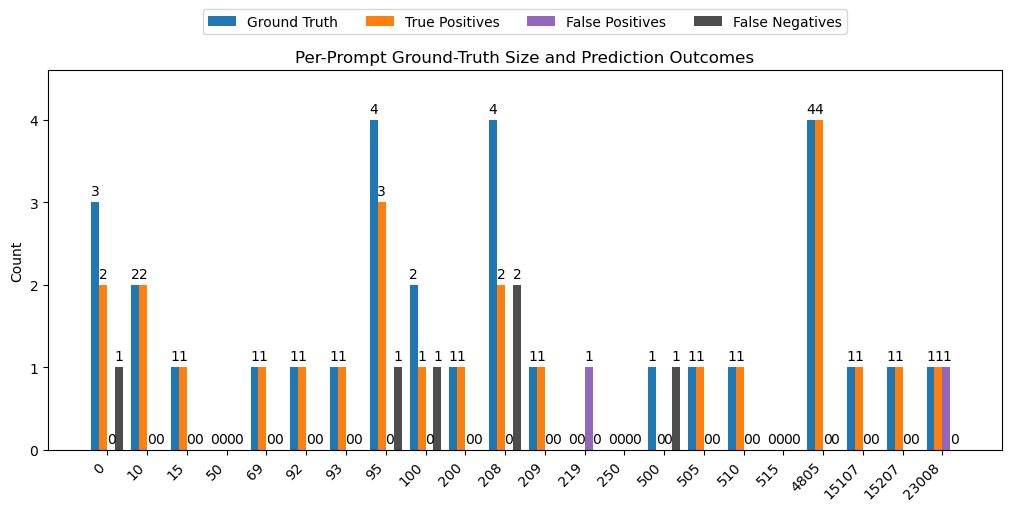

In [398]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Ground Truth'    : ground_truth,
    'True Positives'  : TP_col,
    'False Positives' : FP_col,
    'False Negatives' : FN_col,
}
x = np.arange(len(indices))

cb_palette = ['#1f77b4',   # blue
              '#ff7f0e',   # orange
              '#9467bd',   # purple
              '#4d4d4d']   # dark grey

width = 0.20
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

for i, (name, values) in enumerate(data.items()):
    rects = ax.bar(x + i*width, values, width,
                   label=name, color=cb_palette[i])
    ax.bar_label(rects, padding=3,)

ax.set_title('Per-Prompt Ground-Truth Size and Prediction Outcomes')
ax.set_ylabel('Count')
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(indices, rotation=45, ha='right')
ax.set_ylim(0, max(max(v) for v in data.values()) * 1.15)

ax.legend(loc='upper center', ncols=4, bbox_to_anchor=(0.5, 1.18))
plt.show()


~100 regular output tokens  
~600 reasoning output tokens  
There will be 31,002 responses (excluding sub-captions of compound)

Hence the expected number of output tokens is 700*31,002 = 21,701,400

And we've seen the number of input tokens is 37,426,529

In [47]:
def compute_pricing(input_tokens, output_tokens, input_pricing_per_1m, output_pricing_per_1m):
    """
    Compute the pricing for a given number of input and output tokens, assuming Batch API is used.
    """
    input_cost = (input_tokens / 1_000_000) * input_pricing_per_1m
    output_cost = (output_tokens / 1_000_000) * output_pricing_per_1m
    total_cost = input_cost + output_cost
    return float(np.round(total_cost / 2, 2))

compute_pricing(input_tokens=37_426_529, output_tokens=21_701_400, input_pricing_per_1m=1.1, output_pricing_per_1m=4.4)

68.33